<a href="https://colab.research.google.com/github/Amit-verma2030/dataset_collection/blob/main/customer_satisfaction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('/content/olist_customers_dataset.csv')

In [6]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [7]:
df = pd.read_csv('/content/olist_geolocation_dataset.csv')

In [8]:
df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
157819,6386,-23.531396,-46.837243,carapicuiba,SP
157820,6335,-23.555838,-46.835672,carapicuiba,SP
157821,6352,-23.564534,-46.872611,carapicuiba,SP
157822,6341,-23.570116,-46.825165,carapicuiba,SP


importing library

In [9]:
# Importing Libraries

# Standard libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import json
import requests
import folium
from datetime import datetime
import calendar
from pandas.api.types import CategoricalDtype
import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud
from collections import Counter
from PIL import Image

# Utilities
#from viz_utils import *
#from custom_transformers import *
#from ml_utils import *

# DataPrep
import re
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import joblib

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb


reading dataset

In [10]:
#reading datas
import time
start = time.time()
data = pd.read_csv("olist_customers_dataset.csv")
geo_data = pd.read_csv("olist_geolocation_dataset.csv")
order_itemdata = pd.read_csv("olist_order_items_dataset.csv")
pay_data = pd.read_csv("olist_order_payments_dataset.csv")
rev_data = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
order_prddata = pd.read_csv("olist_products_dataset.csv")
order_selldata = pd.read_csv("olist_sellers_dataset.csv")
order_prd_catdata = pd.read_csv("product_category_name_translation.csv")
end = time.time()
print("reading time: ",(end-start),"sec")

reading time:  1.5253372192382812 sec


In [12]:
#checking number of columns , column_names and no_of_rows

datasets = [data,geo_data,order_itemdata, pay_data, orders, order_prddata,rev_data,order_selldata, order_prd_catdata]
titles = ["customers","geolocations","items", "payments", "orders", "products","reviews","sellers","category_translation"]



info_df = pd.DataFrame({},)
info_df['dataset']= titles

info_df['no_of_columns']= [len(df.columns) for df in datasets ]
info_df['columns_name']= [', '.join(list(df.columns)) for df in datasets]
info_df['no_of_rows'] = [len(df) for df in datasets]

info_df.style.background_gradient(cmap='Greys')

,dataset,no_of_columns,columns_name,no_of_rows
0,customers,5,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441
1,geolocations,5,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",174909
2,items,7,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",76182
3,payments,5,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886
4,orders,8,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",59058
5,products,9,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951
6,reviews,7,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",71964
7,sellers,4,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095
8,category_translation,2,"product_category_name, product_category_name_english",71


In [13]:
#checking dtypes
datasets = [data,geo_data,order_itemdata, pay_data, orders, order_prddata,rev_data,order_selldata, order_prd_catdata]
titles = ["customers","geolocations","items", "payments", "orders", "products","reviews","sellers","category_translation"]

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = pd.DataFrame({},)
new_df['dataset']= titles

new_df['numeric_features'] = [len((df.select_dtypes(include=numerics)).columns) for df in datasets]
new_df['num_features_name'] = [', '.join(list((df.select_dtypes(include=numerics)).columns)) for df in datasets]
new_df['object_features'] = [len((df.select_dtypes(include='object')).columns) for df in datasets]
new_df['objt_features_name'] = [', '.join(list((df.select_dtypes(include='object')).columns)) for df in datasets]
new_df['bool_features'] = [len((df.select_dtypes(include='bool')).columns) for df in datasets]
new_df.style.background_gradient(cmap='Greys')

,dataset,numeric_features,num_features_name,object_features,objt_features_name,bool_features
0,customers,1,customer_zip_code_prefix,4,"customer_id, customer_unique_id, customer_city, customer_state",0
1,geolocations,3,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng",2,"geolocation_city, geolocation_state",0
2,items,3,"order_item_id, price, freight_value",4,"order_id, product_id, seller_id, shipping_limit_date",0
3,payments,3,"payment_sequential, payment_installments, payment_value",2,"order_id, payment_type",0
4,orders,0,,8,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",0
5,products,7,"product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",2,"product_id, product_category_name",0
6,reviews,1,review_score,6,"review_id, order_id, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",0
7,sellers,1,seller_zip_code_prefix,3,"seller_id, seller_city, seller_state",0
8,category_translation,0,,2,"product_category_name, product_category_name_english",0


In [14]:
#checking no of null values
#code source-https://www.kaggle.com/fayhosseini/brazilian-e-commerce-eda-for-beginners

datasets = [data,geo_data,order_itemdata, pay_data, orders, order_prddata,rev_data,order_selldata, order_prd_catdata]
titles = ["customers","geolocations","items", "payments", "orders", "products","reviews","sellers","category_translation"]

info_df_n = pd.DataFrame({},)

info_df_n['dataset']= titles

#creating column of name of columns in the dataset
info_df_n['cols'] = [', '.join([col for col, null in df.isnull().sum().items() ]) for df in datasets]

#creating total number of columns in the dataset
info_df_n['cols_no']= [df.shape[1] for df in datasets]

#counting total null values
info_df_n['null_no']= [df.isnull().sum().sum() for df in datasets]

#creating total number of columns in the dataset with null-values
info_df_n['null_cols_no']= [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

#creating column of name of columns in the dataset with null-values
info_df_n['null_cols'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]


info_df_n.style.background_gradient(cmap='Greys')

,dataset,cols,cols_no,null_no,null_cols_no,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",5,0,0,
1,geolocations,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",5,1,1,geolocation_state
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",7,4,4,"seller_id, shipping_limit_date, price, freight_value"
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",5,0,0,
4,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",8,2908,7,"customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date"
5,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
6,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",7,105744,2,"review_comment_title, review_comment_message"
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",4,0,0,
8,category_translation,"product_category_name, product_category_name_english",2,0,0,


In [16]:
rev_new = rev_data.drop(['review_comment_title','review_creation_date','review_id','review_answer_timestamp'],axis=1)


df = pd.merge(orders,pay_data, on="order_id")
df = df.merge(data, on="customer_id")
df = df.merge(order_itemdata, on="order_id")
df = df.merge(order_prddata, on="product_id")
df = df.merge(order_prd_catdata, on="product_category_name")
df = df.merge(rev_new, on="order_id")
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,4,Muito bom o produto.
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22 00:00:00,1,credit_card,5,135.82,8b8028d453a01986b48c4271cc341475,14500,ituverava,SP,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-13 14:31:29,116.9,18.92,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,5,estou satisfeito
2,9b85bbefeeacfebc3ff603d20511734f,7f4f07b97783e894fccff9d72e0988b3,delivered,2017-11-27 10:32:51,2017-11-27 11:14:36,2017-11-29 15:16:47,2017-12-07 19:48:32,2017-12-20 00:00:00,1,credit_card,3,126.11,293c9db44b6588c4e52fbef455fccde8,88085,florianopolis,SC,1,595fac2a385ac33a80bd5114aec74eb8,ef0ace09169ac090589d85746e3e036f,2017-12-01 11:14:36,109.9,16.21,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,5,"Muito boa a compra, dentro do prazo."
3,6164d50a564536f9c8081d0358573bad,ff83b1b9ffb0f2f60273867bb26f671e,delivered,2018-08-12 22:52:59,2018-08-12 23:05:17,2018-08-13 15:19:00,2018-08-14 20:04:39,2018-08-21 00:00:00,1,credit_card,8,126.23,e84ac1e802114860d63efeff52694d38,35680,itauna,MG,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-14 23:05:17,116.9,9.33,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,5,NaN
4,7c89d1b99dac4362bf2513afd0b14edd,a48acf545fc196fe1a22e67ba443504e,delivered,2018-08-23 21:20:25,2018-08-24 03:24:19,2018-08-24 13:56:00,2018-08-28 21:07:31,2018-09-06 00:00:00,1,boleto,1,132.92,e7e4ae6b758798774a5fa6afdc236c02,1430,sao paulo,SP,1,595fac2a385ac33a80bd5114aec74eb8,ef0ace09169ac090589d85746e3e036f,2018-08-30 03:24:19,117.0,15.92,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,4,NaN


In [17]:
#checking dtypes
datasets = [data,geo_data,order_itemdata, pay_data, orders, order_prddata,rev_data,order_selldata, order_prd_catdata]
titles = ["customers","geolocations","items", "payments", "orders", "products","reviews","sellers","category_translation"]

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = pd.DataFrame({},)
new_df['dataset']= titles

new_df['numeric_features'] = [len((df.select_dtypes(include=numerics)).columns) for df in datasets]
new_df['num_features_name'] = [', '.join(list((df.select_dtypes(include=numerics)).columns)) for df in datasets]
new_df['object_features'] = [len((df.select_dtypes(include='object')).columns) for df in datasets]
new_df['objt_features_name'] = [', '.join(list((df.select_dtypes(include='object')).columns)) for df in datasets]
new_df['bool_features'] = [len((df.select_dtypes(include='bool')).columns) for df in datasets]
new_df.style.background_gradient(cmap='Greys')

,dataset,numeric_features,num_features_name,object_features,objt_features_name,bool_features
0,customers,1,customer_zip_code_prefix,4,"customer_id, customer_unique_id, customer_city, customer_state",0
1,geolocations,3,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng",2,"geolocation_city, geolocation_state",0
2,items,3,"order_item_id, price, freight_value",4,"order_id, product_id, seller_id, shipping_limit_date",0
3,payments,3,"payment_sequential, payment_installments, payment_value",2,"order_id, payment_type",0
4,orders,0,,8,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",0
5,products,7,"product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",2,"product_id, product_category_name",0
6,reviews,1,review_score,6,"review_id, order_id, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",0
7,sellers,1,seller_zip_code_prefix,3,"seller_id, seller_city, seller_state",0
8,category_translation,0,,2,"product_category_name, product_category_name_english",0


In [18]:
#checking no of null values
#code source-https://www.kaggle.com/fayhosseini/brazilian-e-commerce-eda-for-beginners

datasets = [data,geo_data,order_itemdata, pay_data, orders, order_prddata,rev_data,order_selldata, order_prd_catdata]
titles = ["customers","geolocations","items", "payments", "orders", "products","reviews","sellers","category_translation"]

info_df_n = pd.DataFrame({},)

info_df_n['dataset']= titles

#creating column of name of columns in the dataset
info_df_n['cols'] = [', '.join([col for col, null in df.isnull().sum().items() ]) for df in datasets]

#creating total number of columns in the dataset
info_df_n['cols_no']= [df.shape[1] for df in datasets]

#counting total null values
info_df_n['null_no']= [df.isnull().sum().sum() for df in datasets]

#creating total number of columns in the dataset with null-values
info_df_n['null_cols_no']= [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

#creating column of name of columns in the dataset with null-values
info_df_n['null_cols'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]


info_df_n.style.background_gradient(cmap='Greys')

,dataset,cols,cols_no,null_no,null_cols_no,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",5,0,0,
1,geolocations,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",5,1,1,geolocation_state
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",7,4,4,"seller_id, shipping_limit_date, price, freight_value"
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",5,0,0,
4,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",8,2908,7,"customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date"
5,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
6,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",7,105744,2,"review_comment_title, review_comment_message"
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",4,0,0,
8,category_translation,"product_category_name, product_category_name_english",2,0,0,


In [20]:
rev_new = rev_data.drop(['review_comment_title','review_creation_date','review_id','review_answer_timestamp'],axis=1)


df = pd.merge(orders,pay_data, on="order_id")
df = df.merge(data, on="customer_id")
df = df.merge(order_itemdata, on="order_id")
df = df.merge(order_prddata, on="product_id")
df = df.merge(order_prd_catdata, on="product_category_name")
df = df.merge(rev_new, on="order_id")
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,4,Muito bom o produto.
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22 00:00:00,1,credit_card,5,135.82,8b8028d453a01986b48c4271cc341475,14500,ituverava,SP,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-13 14:31:29,116.9,18.92,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,5,estou satisfeito
2,9b85bbefeeacfebc3ff603d20511734f,7f4f07b97783e894fccff9d72e0988b3,delivered,2017-11-27 10:32:51,2017-11-27 11:14:36,2017-11-29 15:16:47,2017-12-07 19:48:32,2017-12-20 00:00:00,1,credit_card,3,126.11,293c9db44b6588c4e52fbef455fccde8,88085,florianopolis,SC,1,595fac2a385ac33a80bd5114aec74eb8,ef0ace09169ac090589d85746e3e036f,2017-12-01 11:14:36,109.9,16.21,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,5,"Muito boa a compra, dentro do prazo."
3,6164d50a564536f9c8081d0358573bad,ff83b1b9ffb0f2f60273867bb26f671e,delivered,2018-08-12 22:52:59,2018-08-12 23:05:17,2018-08-13 15:19:00,2018-08-14 20:04:39,2018-08-21 00:00:00,1,credit_card,8,126.23,e84ac1e802114860d63efeff52694d38,35680,itauna,MG,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-14 23:05:17,116.9,9.33,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,5,NaN
4,7c89d1b99dac4362bf2513afd0b14edd,a48acf545fc196fe1a22e67ba443504e,delivered,2018-08-23 21:20:25,2018-08-24 03:24:19,2018-08-24 13:56:00,2018-08-28 21:07:31,2018-09-06 00:00:00,1,boleto,1,132.92,e7e4ae6b758798774a5fa6afdc236c02,1430,sao paulo,SP,1,595fac2a385ac33a80bd5114aec74eb8,ef0ace09169ac090589d85746e3e036f,2018-08-30 03:24:19,117.0,15.92,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,4,NaN


In [21]:
print("Number of rows after merging:",len(df))
print("Number of columns after merging:",len(df.columns))

Number of rows after merging: 33603
Number of columns after merging: 33


In [22]:
df.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                    3
order_delivered_carrier_date       382
order_delivered_customer_date      706
order_estimated_delivery_date        0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty       

In [23]:
index = (df[df['order_delivered_customer_date'].isnull() == True].index.values)

df["order_approved_at"].fillna(df["order_purchase_timestamp"], inplace=True)
df["order_delivered_customer_date"].fillna(df["order_estimated_delivery_date"], inplace=True)

#dropping order delivery carrier date
df.drop(labels='order_delivered_carrier_date',axis=1,inplace=True)

In [24]:
#checking the replaced values
df.order_estimated_delivery_date[index[0]]

'2018-02-15 00:00:00'

In [25]:
df.order_delivered_customer_date[index[0]]

'2018-02-15 00:00:00'

In [26]:
# Handling missing values of numerical features
df['product_weight_g'].fillna(df['product_weight_g'].median(),inplace=True)
df['product_length_cm'].fillna(df['product_length_cm'].median(),inplace=True)
df['product_height_cm'].fillna(df['product_height_cm'].median(),inplace=True)
df['product_width_cm'].fillna(df['product_width_cm'].median(),inplace=True)

In [27]:
#Handling missing values of text column
print("Percentage of null reviews :",(df.review_comment_message.isnull().sum()/len(df))*100 ,"%")
# filling null value of review comments with no_review
df['review_comment_message'].fillna('nao_reveja',inplace=True)

Percentage of null reviews : 57.78650715709907 %


In [28]:
dup_rows = df[df.duplicated(['order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date','customer_unique_id','review_comment_message'])]
dup_rows.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
12,78037c5f4d9f1f7bab0207f22c4e92f1,ec8f2dcb080511771e52af7ca42117f5,delivered,2018-01-02 17:56:52,2018-01-02 18:10:14,2018-01-16 17:12:37,2018-01-31 00:00:00,1,credit_card,2,261.46,60a1e88691ef46c62b52fb2b994d7675,25850,paraiba do sul,RJ,2,595fac2a385ac33a80bd5114aec74eb8,ef0ace09169ac090589d85746e3e036f,2018-01-08 18:10:14,117.90,12.83,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,2,nao_reveja
21,70b552ddd260593a445a635431384e35,42e503e49de01ed4aec2e7f0bab4b618,delivered,2018-06-11 20:29:45,2018-06-11 20:59:33,2018-06-14 21:23:56,2018-06-28 00:00:00,1,credit_card,4,265.57,5fbfdca262348db58bdfae6bb33b18d3,6351,carapicuiba,SP,1,0e2d365a247d105fefc31b17ab8706d9,1c40343cc5d18c2d8248ac2f3366de34,2018-06-15 20:59:33,122.30,19.30,perfumaria,35.0,503.0,1.0,430.0,21.0,11.0,17.0,perfumery,5,nao_reveja
31,a910f58086d58b3ae6f37aa712d377b9,afb19a4b667cb708caab312757ec3d3f,delivered,2017-09-15 09:19:48,2017-09-15 09:35:18,2017-09-25 20:14:48,2017-10-11 00:00:00,1,credit_card,5,145.66,a7e7b19ff34ab885f7b7331de2417cf3,78043,cuiaba,MT,2,75d6b6963340c6063f7f4cfcccfe6a30,cc419e0650a3c5ba77189a1882b7556a,2017-09-22 09:35:18,56.99,15.84,perfumaria,51.0,999.0,2.0,400.0,18.0,11.0,20.0,perfumery,5,nao_reveja
44,8ff88873f03f1912c00741f8e5ae6c79,ff0bdbbb629b5dc2918fb41b89dd14d8,shipped,2018-01-22 12:49:38,2018-01-24 02:53:02,2018-02-15 00:00:00,2018-02-15 00:00:00,1,boleto,1,71.14,35d2594bdba35e830767b63af353d01a,22775,rio de janeiro,RJ,1,75d6b6963340c6063f7f4cfcccfe6a30,cc419e0650a3c5ba77189a1882b7556a,2018-01-31 02:53:02,56.99,14.15,perfumaria,51.0,999.0,2.0,400.0,18.0,11.0,20.0,perfumery,5,nao_reveja
47,a9893544355d8abefe6473f21f162c5b,1f2f1fd768ccbfb05764c5a6fc6ae3cd,delivered,2017-07-17 10:42:23,2017-07-18 06:05:25,2017-07-26 13:21:33,2017-08-09 00:00:00,1,boleto,1,144.28,69e24da4c221777554eb9b421b4d5fb0,85460,quedas do iguacu,PR,2,75d6b6963340c6063f7f4cfcccfe6a30,cc419e0650a3c5ba77189a1882b7556a,2017-07-25 06:05:25,56.99,15.15,perfumaria,51.0,999.0,2.0,400.0,18.0,11.0,20.0,perfumery,1,Comprei dois kit para maquiagem chegou apenas ...


In [29]:
#Deduplication of entries
df= df.drop_duplicates(subset={'order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date'}, keep='first', inplace=False)
df=df.reindex()
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,4,Muito bom o produto.
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-14 18:51:47,2018-08-22 00:00:00,1,credit_card,5,135.82,8b8028d453a01986b48c4271cc341475,14500,ituverava,SP,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-13 14:31:29,116.9,18.92,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,5,estou satisfeito
2,9b85bbefeeacfebc3ff603d20511734f,7f4f07b97783e894fccff9d72e0988b3,delivered,2017-11-27 10:32:51,2017-11-27 11:14:36,2017-12-07 19:48:32,2017-12-20 00:00:00,1,credit_card,3,126.11,293c9db44b6588c4e52fbef455fccde8,88085,florianopolis,SC,1,595fac2a385ac33a80bd5114aec74eb8,ef0ace09169ac090589d85746e3e036f,2017-12-01 11:14:36,109.9,16.21,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,5,"Muito boa a compra, dentro do prazo."
3,6164d50a564536f9c8081d0358573bad,ff83b1b9ffb0f2f60273867bb26f671e,delivered,2018-08-12 22:52:59,2018-08-12 23:05:17,2018-08-14 20:04:39,2018-08-21 00:00:00,1,credit_card,8,126.23,e84ac1e802114860d63efeff52694d38,35680,itauna,MG,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-14 23:05:17,116.9,9.33,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,5,nao_reveja
4,7c89d1b99dac4362bf2513afd0b14edd,a48acf545fc196fe1a22e67ba443504e,delivered,2018-08-23 21:20:25,2018-08-24 03:24:19,2018-08-28 21:07:31,2018-09-06 00:00:00,1,boleto,1,132.92,e7e4ae6b758798774a5fa6afdc236c02,1430,sao paulo,SP,1,595fac2a385ac33a80bd5114aec74eb8,ef0ace09169ac090589d85746e3e036f,2018-08-30 03:24:19,117.0,15.92,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,4,nao_reveja


In [30]:
print("Number of rows after dedublication:",len(df))
print("Number of columns after deduplication:",len(df.columns))

Number of rows after dedublication: 28139
Number of columns after deduplication: 32


In [31]:
# all time stamps are in object dtype as observed above converting it into dataetime
df[['order_purchase_timestamp','order_approved_at','order_delivered_customer_date','order_estimated_delivery_date',]]=df[['order_purchase_timestamp',
       'order_approved_at','order_delivered_customer_date','order_estimated_delivery_date']].apply(pd.to_datetime)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28139 entries, 0 to 33602
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       28139 non-null  object        
 1   customer_id                    28139 non-null  object        
 2   order_status                   28139 non-null  object        
 3   order_purchase_timestamp       28139 non-null  datetime64[ns]
 4   order_approved_at              28139 non-null  datetime64[ns]
 5   order_delivered_customer_date  28139 non-null  datetime64[ns]
 6   order_estimated_delivery_date  28139 non-null  datetime64[ns]
 7   payment_sequential             28139 non-null  int64         
 8   payment_type                   28139 non-null  object        
 9   payment_installments           28139 non-null  int64         
 10  payment_value                  28139 non-null  float64       
 11  customer_unique

In [33]:
df.describe()

,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
count,28139.000000,28139.000000,28139.000000,28139.000000,28139.000000,28139.000000,28139.000000,28139.000000,28139.000000,28139.000000,28139.000000,28139.000000,28139.000000,28139.000000,28139.000000
mean,1.021358,2.938235,158.701440,35342.212801,1.013647,126.642591,20.113206,48.827748,797.561001,2.244465,2111.798607,30.268773,16.469491,23.172323,4.104517
std,0.210277,2.725107,228.180087,29892.840048,0.132065,192.972316,15.459844,10.018864,660.530304,1.736961,3745.138286,16.325095,13.378414,11.899981,1.327758
min,1.000000,1.000000,0.010000,1005.000000,1.000000,3.490000,0.000000,5.000000,8.000000,1.000000,0.000000,7.000000,2.000000,7.000000,1.000000
25%,1.000000,1.000000,60.745000,11453.000000,1.000000,42.900000,13.370000,42.000000,353.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000
50%,1.000000,2.000000,104.280000,24431.000000,1.000000,79.690000,16.460000,52.000000,608.000000,2.000000,700.000000,25.000000,13.000000,20.000000,5.000000
75%,1.000000,4.000000,176.780000,59332.500000,1.000000,139.990000,21.180000,57.000000,999.000000,3.000000,1825.000000,38.000000,20.000000,30.000000,5.000000
max,10.000000,24.000000,13664.080000,99965.000000,4.000000,6735.000000,339.590000,67.000000,3992.000000,18.000000,40425.000000,105.000000,105.000000,118.000000,5.000000


In [34]:
# checking the target variables i.e review score
df.review_score.value_counts()

5    16287
4     5549
1     3097
3     2357
2      849
Name: review_score, dtype: int64

In [35]:
def partition(x):
    if x < 3:
        return 0
    return 1
df['review_score']=df['review_score'].map(lambda cw : partition(cw) )

# checking the review score now
df.review_score.value_counts()

1    24193
0     3946
Name: review_score, dtype: int64

Total Positive Reviews : 24193 , ( 85.97675823590035 %)
Total Negative Reviews : 3946 , ( 14.023241764099648 %)




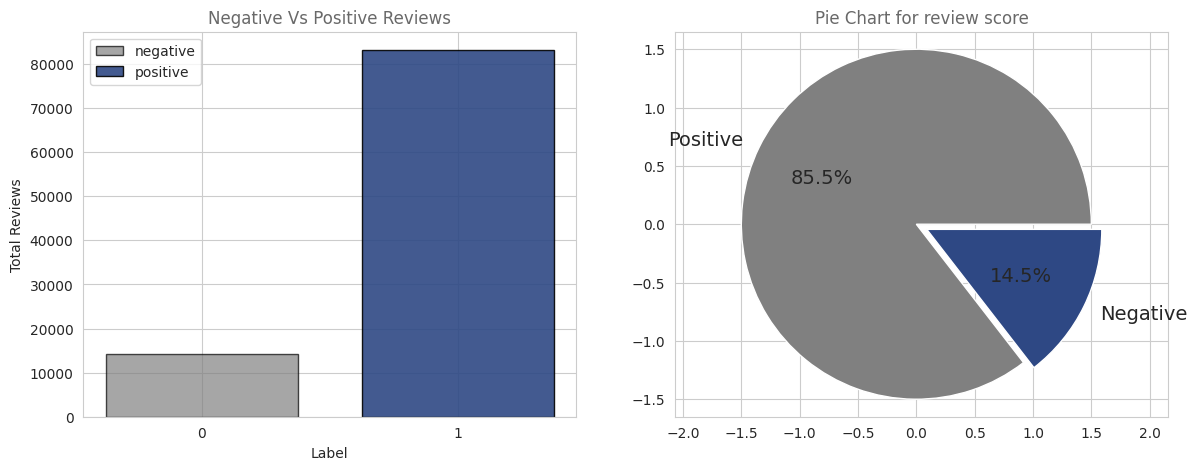

In [36]:
#counting the review score with 1 and 0
y_value_counts = df.review_score.value_counts()

#calculating the percentage of each review type
print("Total Positive Reviews :", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Total Negative Reviews :", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print('\n')

#plotting bar-plot and pie chart
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.ylabel('Total Reviews')
plt.xlabel('Label')
plt.title('Negative Vs Positive Reviews',color='dimgrey')
plt.xticks([10,10.20],['0','1'])
#creating bar plots
plt.bar(10,14112, color = 'grey', width = 0.15,alpha=0.7,label='negative',edgecolor='black')
plt.bar(10.20,83143,color = '#2e4884', width = 0.15,alpha=0.9,label='positive',edgecolor='black')
plt.legend()

plt.subplot(1,2,2)
labels = ['Positive','Negative']
sizes = [83143,14112]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
color={'#2e4884','grey'}
plt.pie(sizes,explode=explode ,colors=color,labels=labels, autopct='%1.1f%%',shadow=False, startangle=0,radius=1.5,labeldistance=1.1,textprops={'fontsize': 14},frame=True, )
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart for review score',color='dimgrey')
plt.show()

In [37]:
#Correlation matrix
corr_matrix = df.corr()

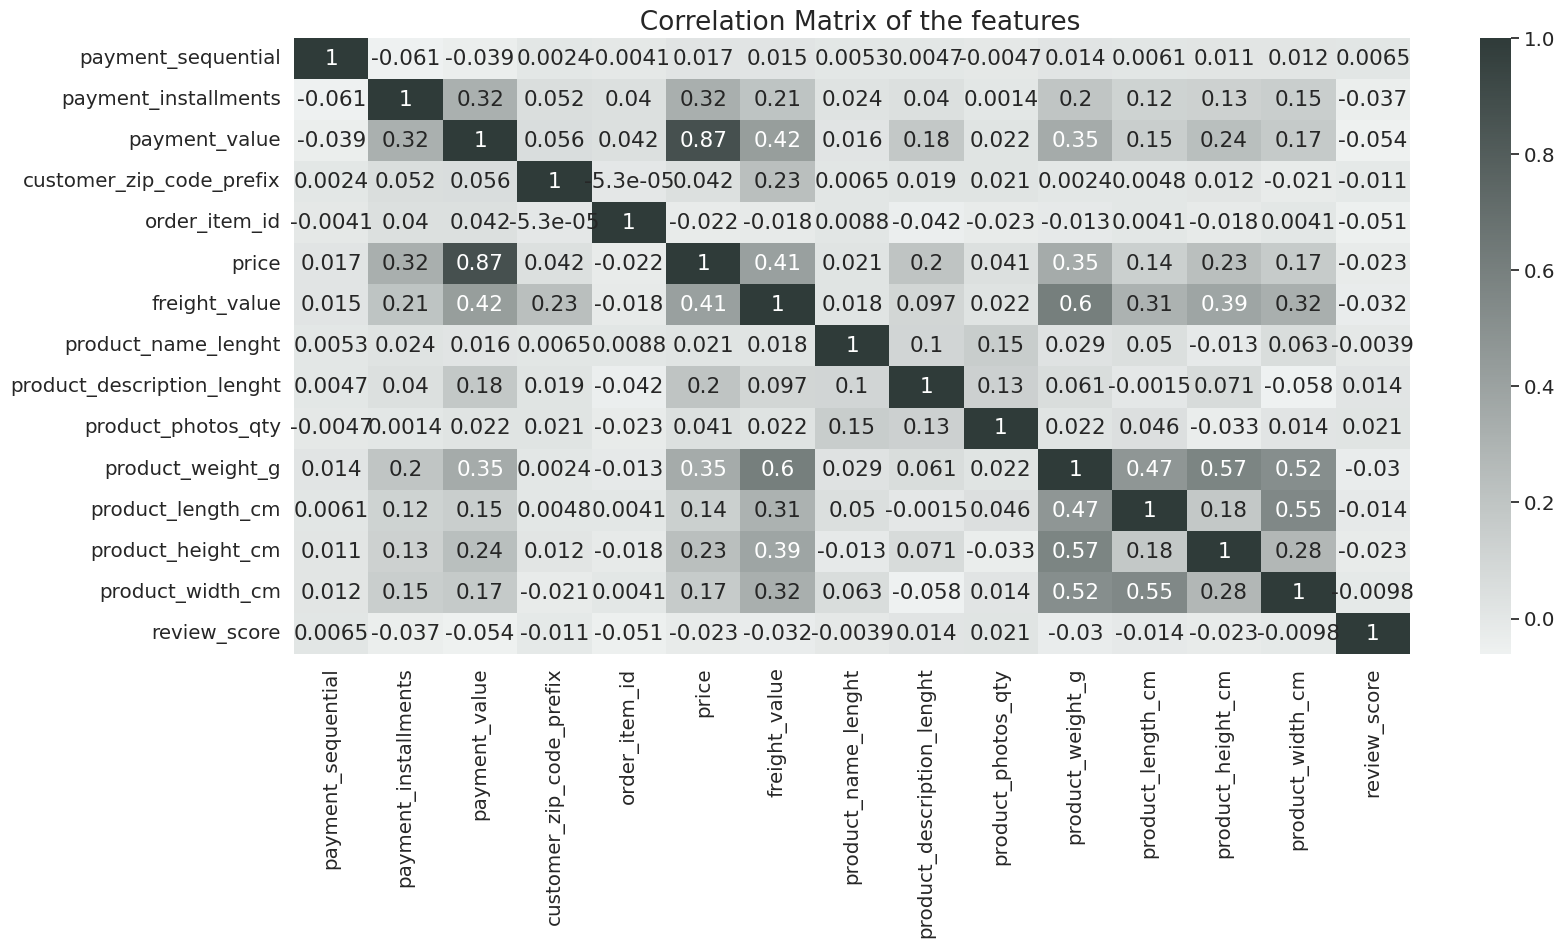

In [38]:
plt.figure(figsize=(18,8))
sns.set(font_scale=1.3)
cmap = sns.light_palette("#2f3b39",as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap,annot=True)
plt.title("  Correlation Matrix of the features",fontsize=19)
plt.savefig('plot16.png', dpi=300, bbox_inches='tight')
plt.show()

In [39]:
#finding corr- values of the features with review_score
corr_matrix["review_score"].sort_values(ascending=False)

review_score                  1.000000
product_photos_qty            0.021310
product_description_lenght    0.014432
payment_sequential            0.006464
product_name_lenght          -0.003910
product_width_cm             -0.009771
customer_zip_code_prefix     -0.011056
product_length_cm            -0.013983
product_height_cm            -0.022809
price                        -0.022813
product_weight_g             -0.029847
freight_value                -0.031602
payment_installments         -0.037172
order_item_id                -0.051266
payment_value                -0.054149
Name: review_score, dtype: float64

In [41]:
#checking unique ids
print("Total number of unique seller_id:",len((df.seller_id).unique()))
print("Total number of unique product_id:",len((df.product_id).unique()))
print("Total number of unique customer_id:",len((df.customer_unique_id).unique()))


Total number of unique seller_id: 2245
Total number of unique product_id: 13877
Total number of unique customer_id: 27822


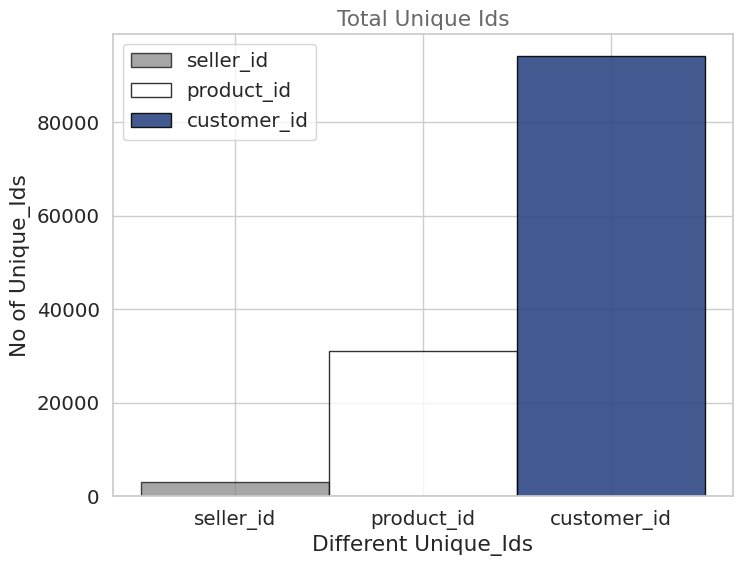

In [42]:
%matplotlib inline
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
plt.ylabel('No of Unique_Ids')
plt.xlabel('Different Unique_Ids')
plt.title('Total Unique Ids',color='dimgrey')
plt.xticks([10,10.25,10.50],['seller_id','product_id','customer_id'])
#creating bar plots
plt.bar(10,3022, color = 'grey', width = 0.25,alpha=0.7,label='seller_id',edgecolor='black')
plt.bar(10.25,31053, color = 'white', width = 0.25,alpha=0.8,label='product_id',edgecolor='black')
plt.bar(10.50,94087, color = '#2e4884', width = 0.25,alpha=0.9,label='customer_id',edgecolor='black')
plt.legend()
plt.show()

In [43]:
df.groupby('payment_type').size()

payment_type
boleto          5514
credit_card    21452
debit_card       422
voucher          751
dtype: int64

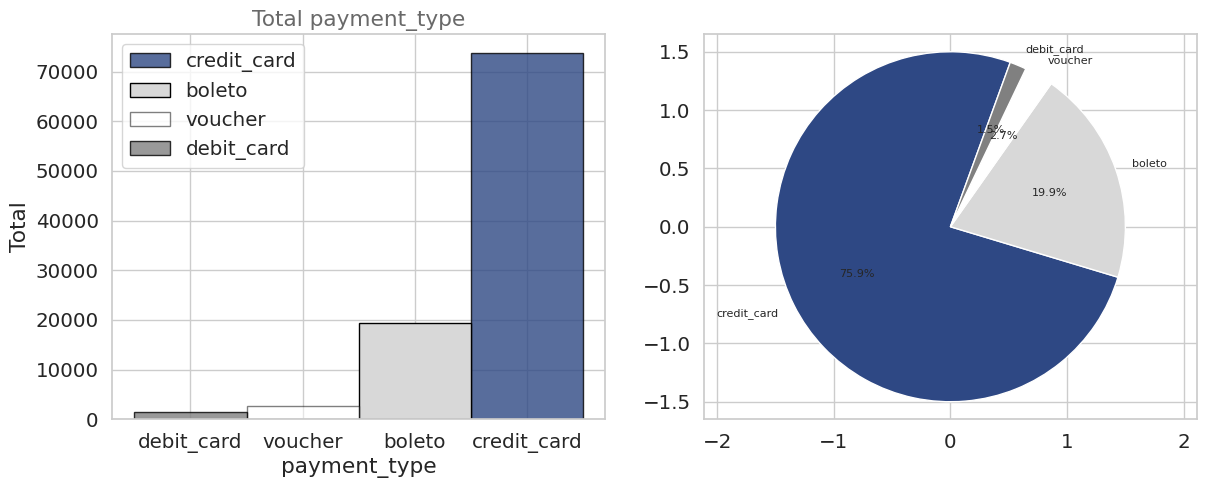

In [44]:
%matplotlib inline
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.ylabel('Total')
plt.xlabel('payment_type')
plt.title('Total payment_type',color='dimgrey')
plt.xticks([10,10.25,10.50,10.75],['debit_card','voucher','boleto','credit_card'])
#creating bar plots
plt.bar(10.75,73816, color = '#2e4884', width = 0.25,alpha=0.8,label='credit_card',edgecolor='black')
plt.bar(10.50,19345, color = '#d8d8d8', width = 0.25,label='boleto',edgecolor='black')
plt.bar(10.25,2604, color = 'white', width = 0.25,alpha=0.5,label='voucher',edgecolor='black')
plt.bar(10,1490, color = 'grey', width = 0.25,alpha=0.8,label='debit_card',edgecolor='black')



plt.legend()

plt.subplot(1,2,2)
s= [ 73816,19345, 2604,1490]
new = ['credit_card','boleto','voucher','debit_card']

explode = (0, 0, 0,0)
colours = {'credit_card': '#2e4884',
           'boleto': '#d8d8d8',
           'voucher': 'w',
           'debit_card': 'grey'}

color ={'#2e4884','grey','#d8d8d8','w'}



plt.pie(s, explode=explode, labels=new,colors=[colours[key] for key in new] , autopct='%1.1f%%',shadow=False, startangle=70,radius=1.5,frame=True,textprops={'fontsize': 8})
plt.axis('equal')
plt.show()

In [45]:
temp = pd.DataFrame(df.groupby('payment_type')['review_score'].agg(lambda x: x.eq(1).sum())).reset_index()

# Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
temp['total'] = list(pd.DataFrame(df.groupby('payment_type')['review_score'].agg([('total','count'),('Avg','mean')]))['total'])
temp['Avg']   = list(pd.DataFrame(df.groupby('payment_type')['review_score'].agg([('total','count'),('Avg','mean')]))['Avg'])
#sorting dataframe
temp = temp.sort_values(by=['total'], ascending=True)

In [46]:
#Simplifing the plots using pareto plots
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()

    fig, ax1 = plt.subplots(figsize=(10,6))
    ax1.bar(x, y,color='#2e4884',edgecolor='black',alpha=0.9)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5,color='black')
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')

    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])

    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]),fontsize=15)

    if title:
        plt.title(title,color='dimgrey',fontsize=15)

    plt.tight_layout()
    plt.show()

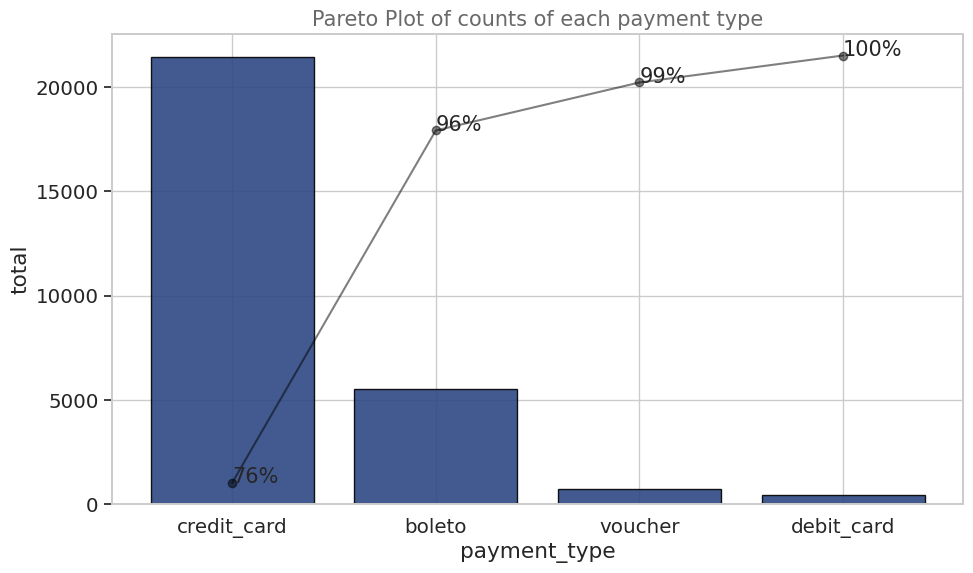

In [47]:
pareto_plot(temp,x='payment_type',y='total',title="Pareto Plot of counts of each payment type")

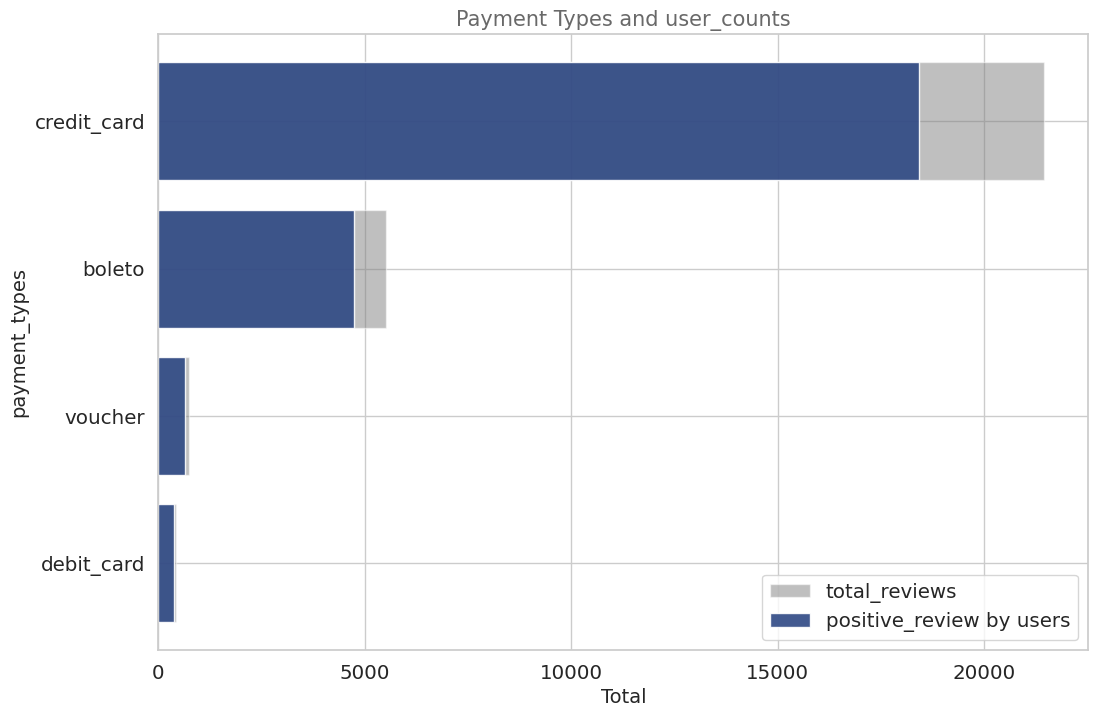

In [48]:
#Let us see how this categorical feature related with our target variable
#code source-https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html
plt.figure(figsize=(12,8))
p1=plt.barh(temp.payment_type,temp.total,color='grey',alpha=0.5)
p2=plt.barh(temp.payment_type,temp.review_score,color='#2e4884',alpha=0.9)
plt.title('Payment Types and user_counts',fontsize=15,color='dimgrey')
plt.ylabel('payment_types',fontsize=14)
plt.xlabel('Total',fontsize=14)
plt.legend((p1[0], p2[0]), ('total_reviews', 'positive_review by users'))

plt.show()

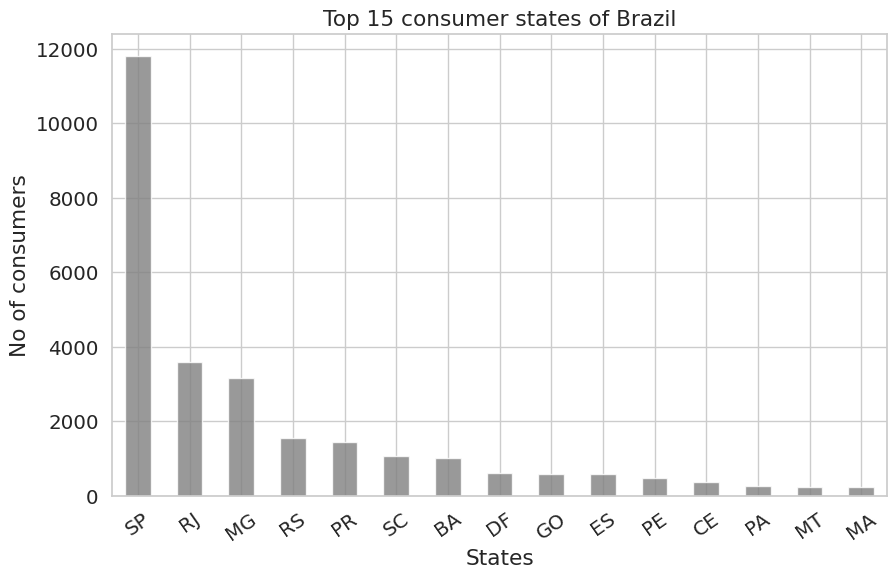

In [49]:
# State with the consumers count
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
ax = df.customer_state.value_counts().sort_values(ascending=False)[0:15].plot(kind='bar', color = 'grey', alpha=0.8)
ax.set_title("Top 15 consumer states of Brazil")
ax.set_xlabel("States")
plt.xticks(rotation=35)
ax.set_ylabel("No of consumers")
plt.show()

In [50]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2, col3='total'):
    ind = np.arange(data.shape[0])

    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values,color = 'grey',alpha=0.5)
    p2 = plt.bar(ind, data[col2].values,color= '#2e4884',alpha=0.8)

    plt.ylabel('Reviews')
    plt.title('% of review_score  ')
    plt.xticks(ind-0.1, list(data[xtick].values), rotation=0)
    plt.legend((p1[0], p2[0]), ('total_reviews', 'positive_review'))
    plt.show()

In [51]:
# Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
temp_1 = pd.DataFrame(df.groupby('customer_state')['review_score'].agg(lambda x: x.eq(1).sum())).reset_index()

# Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039


temp_1['total'] = list(pd.DataFrame(df.groupby('customer_state')['review_score'].agg([('total','count'),('Avg','mean')]))['total'])
temp_1['Avg']   = list(pd.DataFrame(df.groupby('customer_state')['review_score'].agg([('total','count'),('Avg','mean')]))['Avg'])
temp_1= temp_1.rename(columns={'review_score':'positive_review'})
temp_1= temp_1.sort_values(by=['total'], ascending=False)

In [53]:
temp_1

,customer_state,positive_review,total,Avg
25,SP,10397,11804,0.880803
18,RJ,2854,3591,0.794765
10,MG,2775,3172,0.874842
22,RS,1340,1548,0.865633
17,PR,1282,1443,0.888427
23,SC,919,1068,0.860487
4,BA,836,1010,0.827723
6,DF,520,611,0.851064
8,GO,505,601,0.840266
7,ES,501,577,0.868284


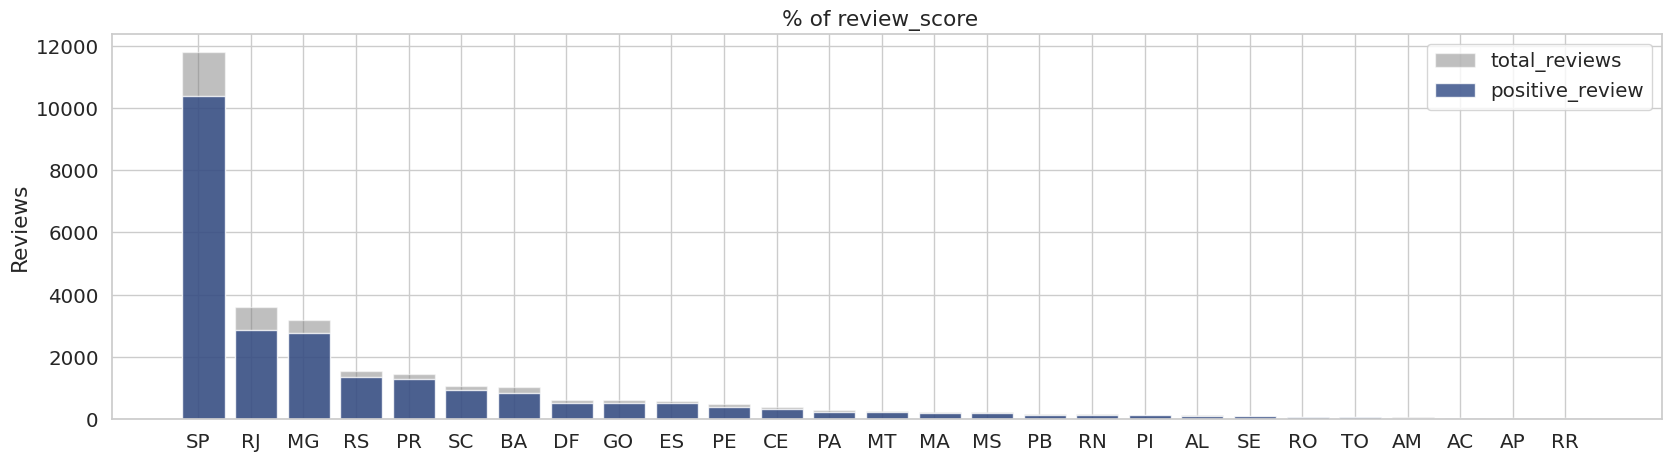

In [54]:
stack_plot(temp_1,'customer_state',col2='positive_review', col3='total')

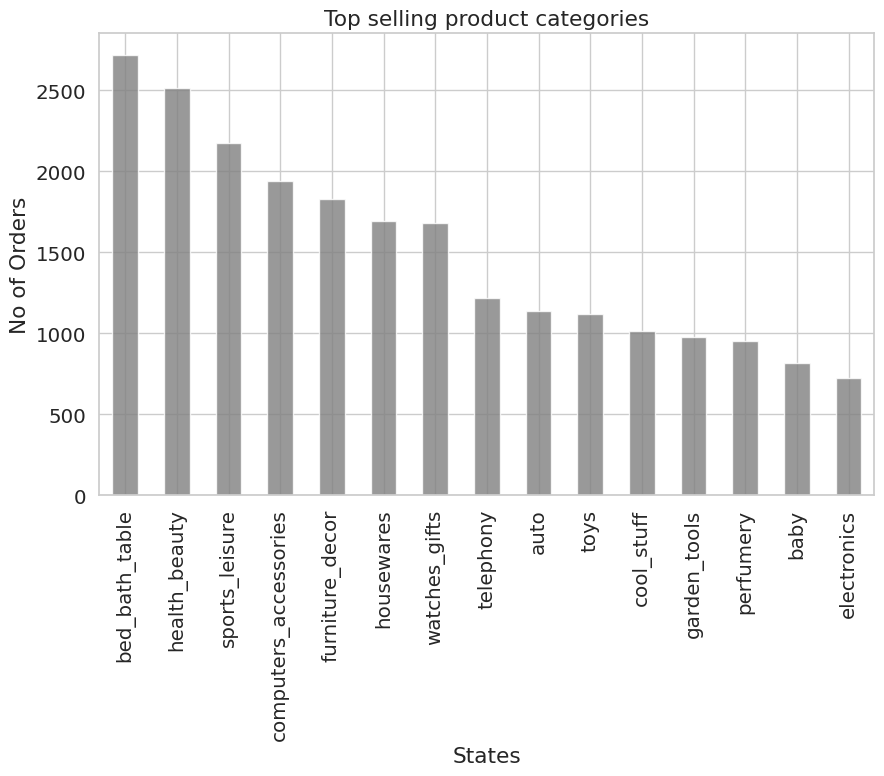

In [55]:
# State with the consumers count
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
ax = df.product_category_name_english.value_counts().sort_values(ascending=False)[0:15].plot(kind='bar', color = 'grey', alpha=0.8)
ax.set_title("Top selling product categories")
ax.set_xlabel("States")
plt.xticks(rotation=90)
ax.set_ylabel("No of Orders")
plt.show()

In [61]:
  temp_2 = pd.DataFrame(df.groupby('product_category_name_english')['review_score'].agg(lambda x: x.eq(1).sum())).reset_index()

  # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039


  temp_2['total'] = list(pd.DataFrame(df.groupby('product_category_name_english')['review_score'].agg([('total','count'),('Avg','mean')]))['total'])
  temp_2['Avg']   = list(pd.DataFrame(df.groupby('product_category_name_english')['review_score'].agg([('total','count'),('Avg','mean')]))['Avg'])
  temp_2 = temp_2.sort_values(by=['total'], ascending=True)
  temp_2

,product_category_name_english,review_score,total,Avg
61,security_and_services,1,1,1.000000
11,cds_dvds_musicals,3,3,1.000000
29,fashion_childrens_clothes,2,3,0.666667
52,la_cuisine,2,3,0.666667
23,diapers_and_hygiene,4,4,1.000000
...,...,...,...,...
39,furniture_decor,1520,1827,0.831965
15,computers_accessories,1632,1939,0.841671
65,sports_leisure,1884,2174,0.866605
43,health_beauty,2196,2516,0.872814


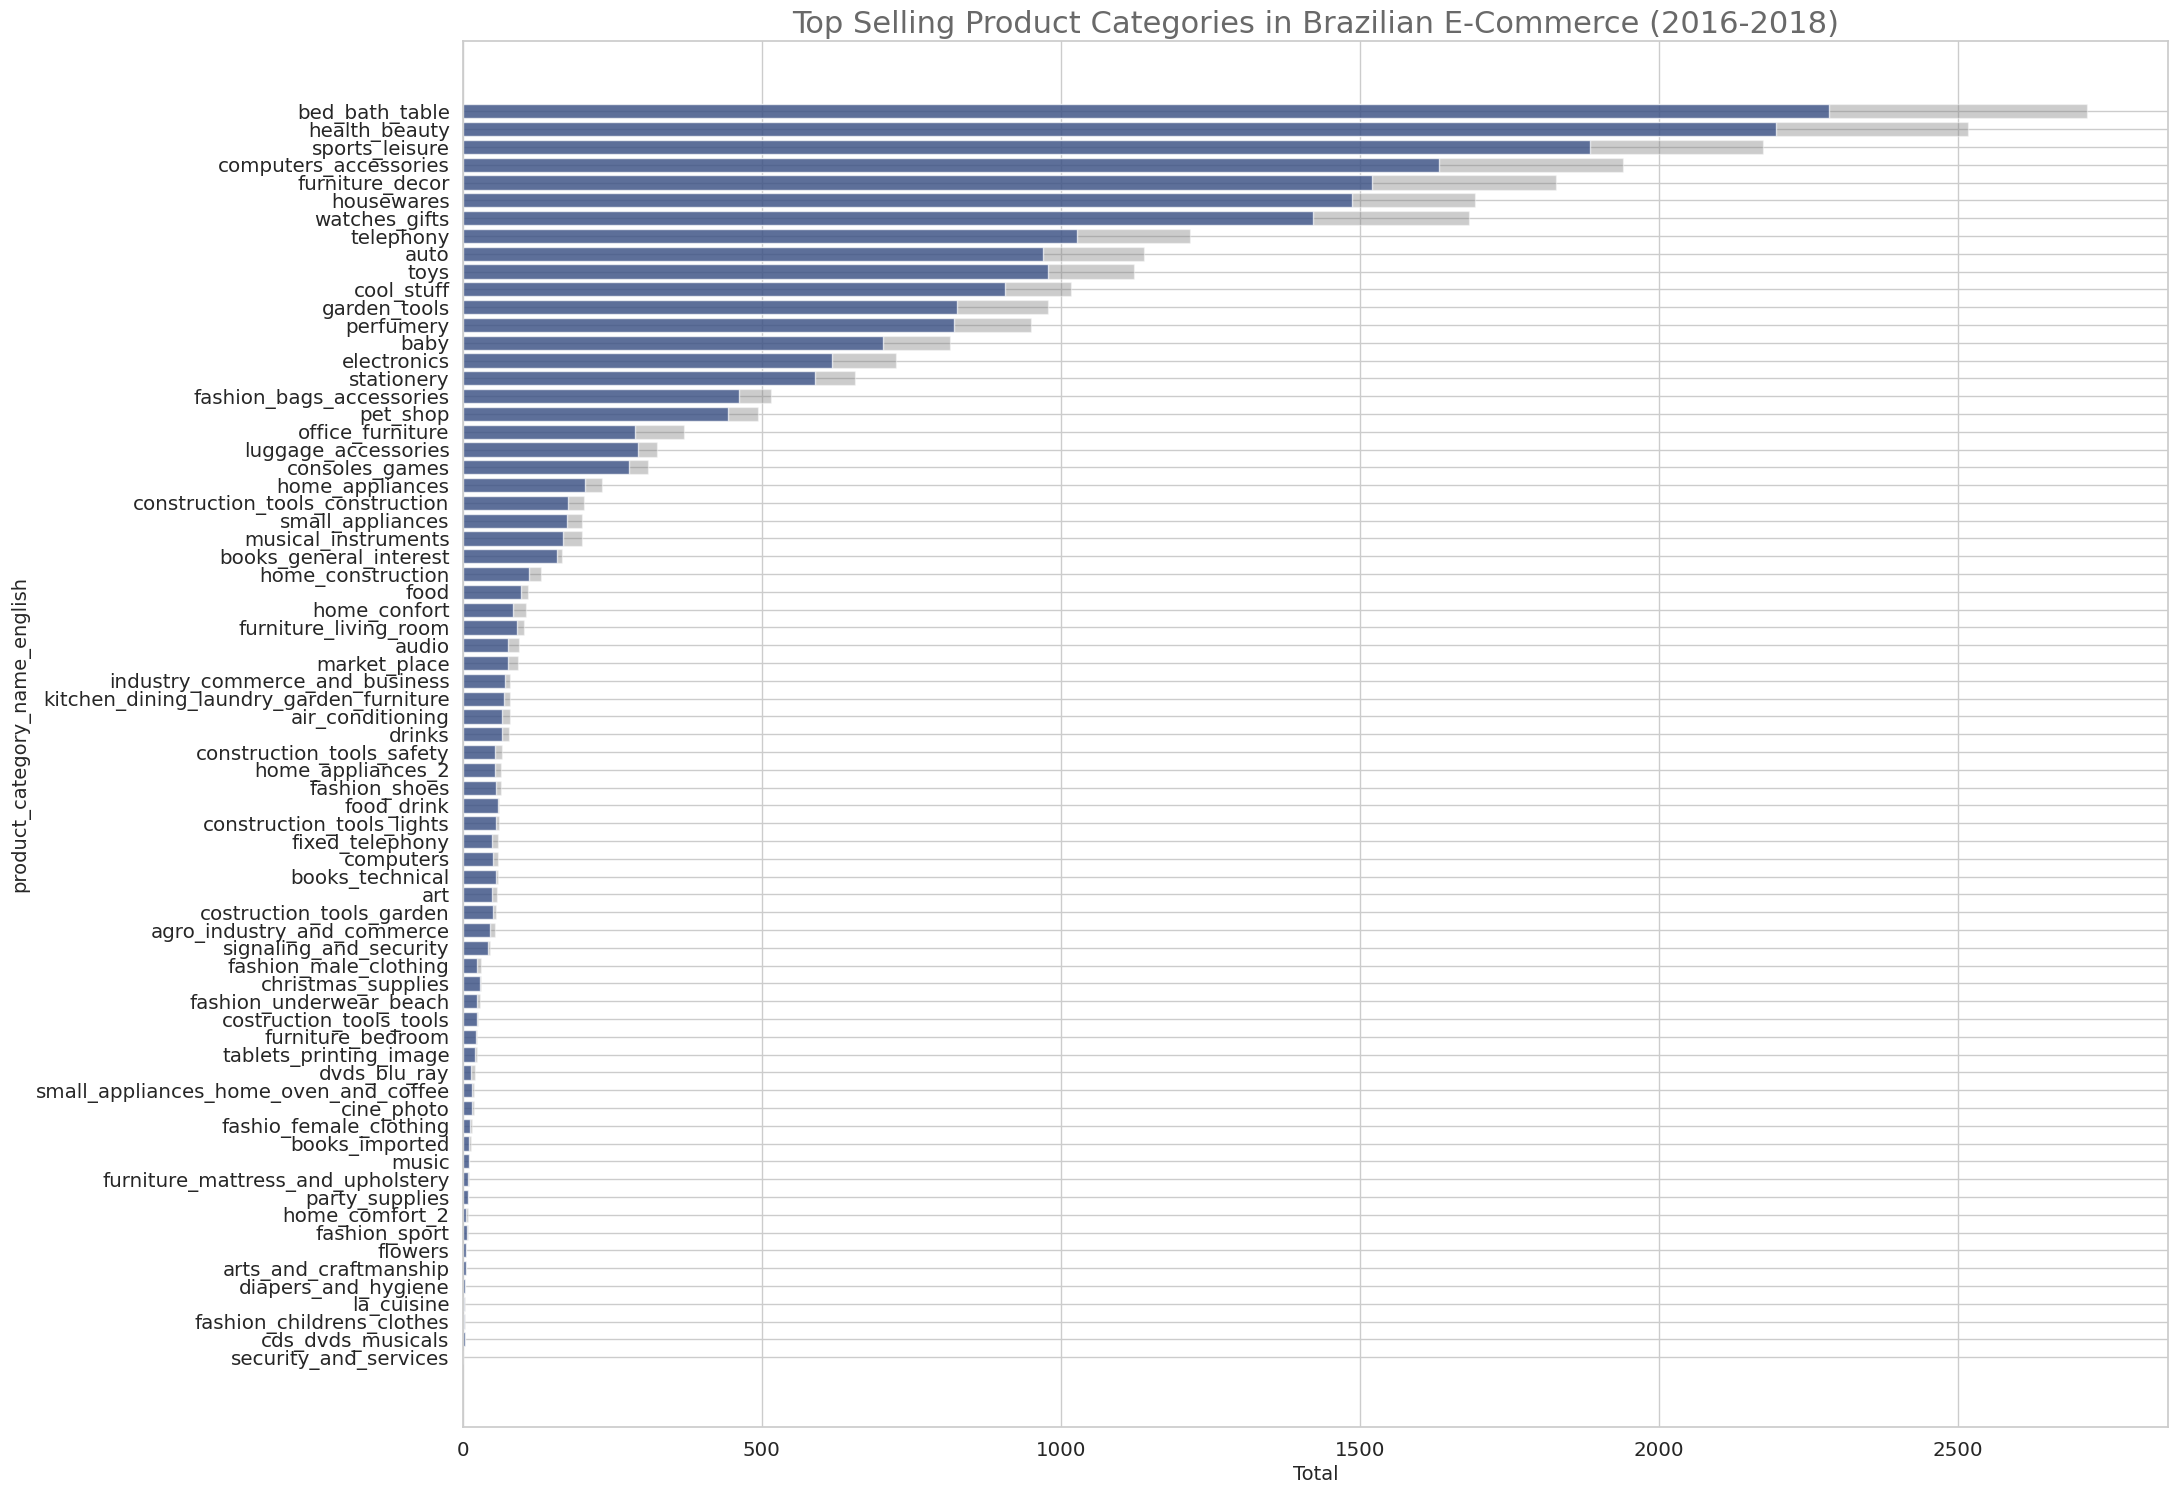

In [62]:
#code source-https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html
plt.figure(figsize=(22,18))
plt.barh(temp_2.product_category_name_english,temp_2.total,color='grey',alpha=0.4)
plt.barh(temp_2.product_category_name_english,temp_2.review_score,color='#2e4884',alpha=0.7)
plt.title('Top Selling Product Categories in Brazilian E-Commerce (2016-2018)',fontsize=22,color='dimgrey')
plt.ylabel('product_category_name_english',fontsize=14)
plt.xlabel('Total',fontsize=14)
plt.savefig('plot14.png', dpi=480, bbox_inches='tight')
plt.show()

Text(0.5, 1.0, 'Number of orders per customer')

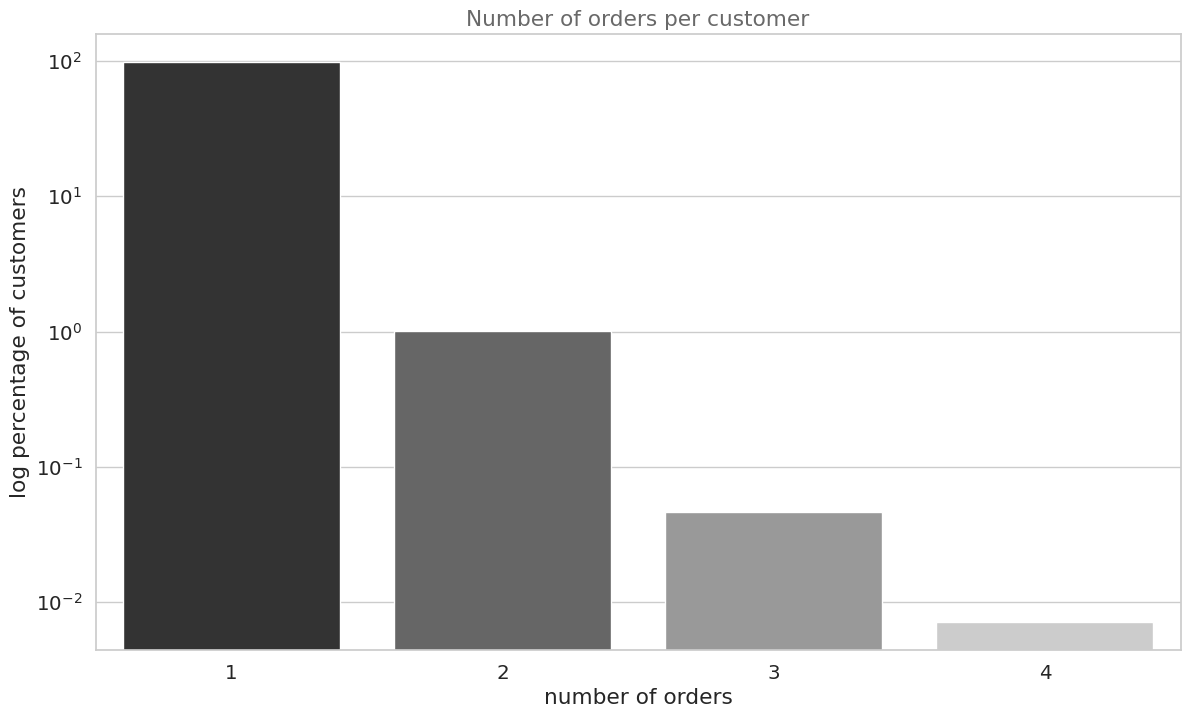

In [63]:
# plotting frequency orders vs  the number of consumers
plt.figure(figsize=(14,8))

#counting the consumers and converting it into percentage to visualize the distribution properly
num_orders=df['customer_unique_id'].value_counts().value_counts()/df.shape[0]*100
num_orders=num_orders.reset_index()
#renaming the columns
num_orders.rename(columns={'index':'number of orders', 'customer_unique_id':'log percentage of customers'},inplace=True)

#plotting bar plot
sns.barplot(data=num_orders,x='number of orders',y='log percentage of customers',palette='gray')
plt.yscale('log') #log scale
plt.title('Number of orders per customer',color='dimgrey')